In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("tennis_ball.jpeg")

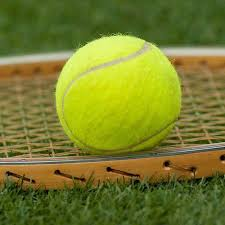

In [ ]:

cv2_imshow(img)

Shape of HSV image: (225, 225, 3)
Shape of lower_yellow: (3,)
Shape of upper_yellow: (3,)


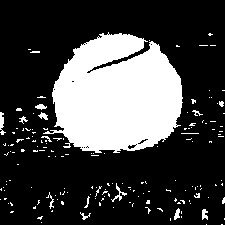

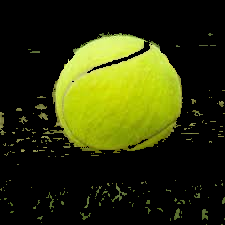

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print("Shape of HSV image:", hsv.shape)

lower_yellow = np.array([30, 100, 100], dtype=np.uint8)
upper_yellow = np.array([40, 255, 255], dtype=np.uint8)
print("Shape of lower_yellow:", lower_yellow.shape)
print("Shape of upper_yellow:", upper_yellow.shape)
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(img,img, mask= mask)

# display the mask and masked image
cv2_imshow(mask)
cv2.waitKey(0)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Step 6: Convert the masked image to grayscale
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Step 7: Apply Gaussian Blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

edges = cv2.Canny(blurred, 50, 150)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 6, 6],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 8, 7, 7]], dtype=uint8)
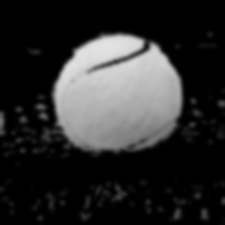

In [ ]:
blurred

### max_circle should be defined to get better results

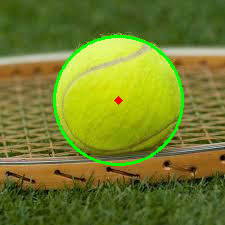

In [ ]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)


# if circles is not None:
#     circles = np.uint16(np.around(circles))
#     for i in circles[0, :]:
#         # Draw the outer circle
#         cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
#         # Draw the center of the circle
#         cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
final_img = img.copy()

max_circles = 3

if circles is not None:
    # Convert circles to integer coordinates for drawing
    circles = np.uint16(np.around(circles))

    # Limit the number of circles drawn (based on max_circles)
    circles_to_draw = circles[0, :max_circles]

    for i in circles_to_draw:
      # Draw the outer circle
      cv2.circle(final_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
      # Draw the center of the circle
      cv2.circle(final_img, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2_imshow(final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


array([[[ 24,  87,  71],
        [ 24,  87,  71],
        [ 24,  88,  69],
        ...,
        [ 50,  97,  71],
        [ 50,  96,  73],
        [ 50,  97,  75]],

       [[ 24,  87,  71],
        [ 24,  87,  71],
        [ 24,  88,  69],
        ...,
        [ 50,  97,  71],
        [ 49,  97,  73],
        [ 46,  93,  71]],

       [[ 22,  88,  69],
        [ 22,  88,  69],
        [ 22,  88,  69],
        ...,
        [ 47,  95,  69],
        [ 47,  95,  69],
        [ 42,  90,  66]],

       ...,

       [[ 35,  88,  68],
        [ 30,  83,  63],
        [ 27,  78,  58],
        ...,
        [ 36,  93,  72],
        [ 35,  92,  71],
        [ 38,  90,  72]],

       [[ 35,  88,  68],
        [ 30,  84,  61],
        [ 22,  75,  55],
        ...,
        [ 40,  97,  76],
        [ 40,  96,  77],
        [ 35,  87,  69]],

       [[ 32,  86,  63],
        [ 21,  76,  51],
        [  7,  61,  38],
        ...,
        [ 45, 100,  81],
        [ 36,  91,  72],
        [ 33,  85,  67]]], dtype=uint8)
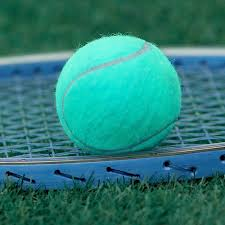

In [ ]:
img